# CEDA DataPoint - Demonstration

The CEDA DataPoint module wraps both the ``pystac_client`` and ``xarray`` packages into a single container for searching and accessing data. This notebook shows how methods function in DataPoint.

In [1]:
from ceda_datapoint import DataPointClient

client = DataPointClient(org='CEDA') # All public connection kwargs are known by default for CEDA
client

<DataPointClient: CEDA-DP:nyxeq2wt78>

With the DataPointClient a user can find the collections offered by the organisation/STAC API and view the search terms for each collection (or just for one collection)

In [2]:
client.list_collections()

cci: cci
cmip6: CMIP6
cordex: CORDEX
eocis-sst-cdrv3: EOCIS Sea-Surface Temperatures V3
eocis-sst-cdrv3-climatology: ESA SST CCI Climatology v3.0
land_cover: Land Cover
sentinel1: Sentinel 1
sentinel2_ard: sentinel 2 ARD
ukcp: UKCP


The searchable query terms can be listed for all collections or a specific collection if known.

In [3]:

client.list_query_terms(collection='cci')

cci: ['datetime', 'start_datetime', 'end_datetime', 'units', 'project_id', 'institution_id', 'platform_id', 'activity_id', 'source_id', 'table_id', 'project', 'product_version', 'frequency', 'variables', 'doi', 'uuid', 'created', 'updated']


## Search for STAC items using the client
Using the search terms above as part of a 'query', users can obtain a DataPointSearch instance which enables access to a set of items from the collection.

In [4]:
item_search = client.search(
    collections=['eocis-sst-cdrv3'],
    max_items=2
)

It may be useful to show what search terms were applied, as listed below

In [5]:
item_search.info()

<DataPointSearch: CEDA-DP:nyxeq2wt78-DP:dj5ljvf53h ({'collections': ['eocis-sst-cdrv3'], 'max_items': 2})>
Search terms:
 - collections: ['eocis-sst-cdrv3']
 - max_items: 2


Attributed to each item, there may be one or more cloud assets which can be opened as datasets by datapoint. These can be listed for your search results using the below syntax:

In [6]:
item_search.display_cloud_assets()

<DataPointItem: d148b847-2988-45f3-922d-162d22cade6d (Collection: eocis-sst-cdrv3)>
 - kerchunk
<DataPointItem: c13ce464-d878-4b01-a241-2ec22b0291b7 (Collection: eocis-sst-cdrv3)>
 - kerchunk


The syntax `reference_file` is the current way of tracking reference-type files in our STAC index. This could potentially be changed in a production version to be more useful for users (i.e kerchunk_file, cfa_file, zarr_store etc.)

Any item may be selected from the item_search by simply indexing as if it were a list (or a dictionary using the appropriate Item ID as it appears above).

In [7]:
item = item_search[0]
item.variables

WARNING [ceda_datapoint.mixins.properties]: Attribute not found from options: ['variables', 'variable_long_name']


In [8]:
ds_set = item.get_cloud_assets()
ds_set

<DataPointCloudProduct: d148b847-2988-45f3-922d-162d22cade6d-reference_file (Format: kerchunk)>

In [9]:
cluster = item_search.open_cluster()
cluster

<DataPointCluster: CEDA-DP:nyxeq2wt78-DP:dj5ljvf53h-DP:5265idh7xu (Datasets: 2)>

Certain item properties that are common across all/most collections have been turned into class properties for the item objects. These will display `None` if the item does not contain that property. All other item properties can be obtained either as a complete dictionary, or selected individually using the below methods:

In [10]:
cluster.help()

DataPointCluster Help:
 > cluster.info() - basic cluster information
 > cluster.display_datasets() - find information on datasets within this cluster
 > cluster.open_dataset(index/id) - open a specific dataset in xarray
See the documentation at https://cedadev.github.io/datapoint/


In [11]:
cluster.info()

<DataPointCluster: CEDA-DP:nyxeq2wt78-DP:dj5ljvf53h-DP:5265idh7xu (Datasets: 2)>
 - <DataPointCloudProduct: d148b847-2988-45f3-922d-162d22cade6d-reference_file (Format: kerchunk)>
 - <DataPointCloudProduct: c13ce464-d878-4b01-a241-2ec22b0291b7-reference_file (Format: kerchunk)>


In [12]:
cluster.open_dataset(0)

<xarray.Dataset> Size: 726MB
Dimensions:                   (time: 1, lat: 3600, lon: 7200, bnds: 2)
Coordinates:
  * lat                       (lat) float32 14kB -89.97 -89.93 ... 89.93 89.97
  * lon                       (lon) float32 29kB -180.0 -179.9 ... 179.9 180.0
  * time                      (time) datetime64[ns] 8B 2023-12-31T12:00:00
Dimensions without coordinates: bnds
Data variables:
    analysed_sst              (time, lat, lon) float64 207MB dask.array<chunksize=(1, 900, 1800), meta=np.ndarray>
    analysed_sst_uncertainty  (time, lat, lon) float64 207MB dask.array<chunksize=(1, 900, 1800), meta=np.ndarray>
    lat_bnds                  (lat, bnds) float32 29kB dask.array<chunksize=(3600, 2), meta=np.ndarray>
    lon_bnds                  (lon, bnds) float32 58kB dask.array<chunksize=(7200, 2), meta=np.ndarray>
    mask                      (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1200, 2400), meta=np.ndarray>
    sea_ice_fraction          (time, lat, lon) float64 207MB dask.array<chunksize=(1, 1200, 2400), meta=np.ndarray>
    time_bnds                 (time, bnds) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/66)
    Conventions:                    CF-1.5, Unidata Observation Dataset v1.0
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    acknowledgment:                 The European Space Agency (ESA) funded th...
    cdm_data_type:                  grid
    comment:                        These data were produced by the Met Offic...
    contact:                        https://climate.esa.int/en/projects/sea-s...
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            20231231T000000Z
    title:                          ESA SST CCI Analysis v3.0
    tracking_id:                    ef4779ea-3d9a-42b5-8423-9da05b7b7d7d
    uuid:                           ef4779ea-3d9a-42b5-8423-9da05b7b7d7d
    westernmost_longitude:          -180.0

## Opening datasets
The key aspect of using DataPoint to search for data is that the cloud assets from each item can be opened seamlessly into an Xarray dataset, without the user needing to know any configuration details for the specific dataset. An example (with additional kwargs) is shown below.

In [13]:
ds = item.open_dataset()
ds

<xarray.Dataset> Size: 726MB
Dimensions:                   (time: 1, lat: 3600, lon: 7200, bnds: 2)
Coordinates:
  * lat                       (lat) float32 14kB -89.97 -89.93 ... 89.93 89.97
  * lon                       (lon) float32 29kB -180.0 -179.9 ... 179.9 180.0
  * time                      (time) datetime64[ns] 8B 2023-12-31T12:00:00
Dimensions without coordinates: bnds
Data variables:
    analysed_sst              (time, lat, lon) float64 207MB dask.array<chunksize=(1, 900, 1800), meta=np.ndarray>
    analysed_sst_uncertainty  (time, lat, lon) float64 207MB dask.array<chunksize=(1, 900, 1800), meta=np.ndarray>
    lat_bnds                  (lat, bnds) float32 29kB dask.array<chunksize=(3600, 2), meta=np.ndarray>
    lon_bnds                  (lon, bnds) float32 58kB dask.array<chunksize=(7200, 2), meta=np.ndarray>
    mask                      (time, lat, lon) float32 104MB dask.array<chunksize=(1, 1200, 2400), meta=np.ndarray>
    sea_ice_fraction          (time, lat, lon) float64 207MB dask.array<chunksize=(1, 1200, 2400), meta=np.ndarray>
    time_bnds                 (time, bnds) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/66)
    Conventions:                    CF-1.5, Unidata Observation Dataset v1.0
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    acknowledgment:                 The European Space Agency (ESA) funded th...
    cdm_data_type:                  grid
    comment:                        These data were produced by the Met Offic...
    contact:                        https://climate.esa.int/en/projects/sea-s...
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            20231231T000000Z
    title:                          ESA SST CCI Analysis v3.0
    tracking_id:                    ef4779ea-3d9a-42b5-8423-9da05b7b7d7d
    uuid:                           ef4779ea-3d9a-42b5-8423-9da05b7b7d7d
    westernmost_longitude:          -180.0

From this point, the dataset is a standard Xarray dataset with no extra features, so anyone comfortable using Xarray will be fine from here. There may be an option in the future to add cf-python support (using the `mode` kwarg) but this has not been implemented yet (mostly because the reference kerchunk files cannot be interpreted by cf-python.)

In [14]:
%%time
result = ds['analysed_sst'].isel(time=slice(0,5)).mean(dim='time')

CPU times: user 1.38 ms, sys: 169 μs, total: 1.54 ms
Wall time: 1.59 ms


CPU times: user 660 ms, sys: 108 ms, total: 768 ms
Wall time: 3.11 s


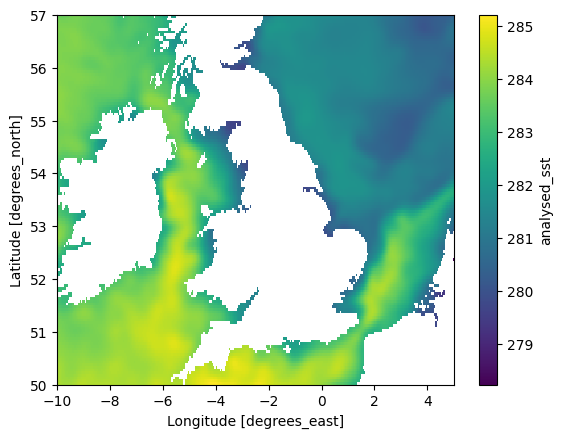

In [15]:
%%time
result.sel(lat=slice(50,57), lon=slice(-10,5)).plot()

## Opening a CFA dataset
At the moment the kerchunk datasets take priority when opening the dataset, but this can be overridden as shown below.

In [21]:
item_cfa = client.search(
    collections=['cmip6'],
    query=[
        'experiment_id=ssp119',
        'institution_id=CNRM-CERFACS',
        'activity_id=ScenarioMIP',
        'mip_era=CMIP6',
        'cf_standard_name=specific_humidity'
    ]
)
item_cfa

<DataPointSearch: CEDA-DP:nyxeq2wt78-DP:95wfdbb1lh ({'collections': ['cmip6'], 'query': 5})>

The `item_search` object contains a single item from the CMIP6 collection which has a CFA asset (listed as `reference_file_2`)

In [17]:
item_cfa.display_cloud_assets()

<DataPointItem: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.3hr.huss.gr.v20190328 (Collection: cmip6)>
 - CFA, kerchunk
<DataPointItem: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.day.huss.gr.v20190328 (Collection: cmip6)>
 - kerchunk
<DataPointItem: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.Amon.huss.gr.v20190328 (Collection: cmip6)>
 - kerchunk


We can then open the CFA-netCDF file specifically by setting this in the priority list as the first option. (Without the priority option this would currently default to kerchunk - further standards considerations are needed.)

In [22]:
cluster = item_cfa.open_cluster()
cluster

<DataPointCluster: CEDA-DP:nyxeq2wt78-DP:95wfdbb1lh-DP:pq2hvcu2vh (Datasets: 4)>

Because there are multiple datasets in this search, we receive a DataPointCluster of datasets, which is effectively a fancy list. We can easily view one of the datasets by indexing the cluster. Other methods could be added to the cluster in the future, but for now it acts as a simple container for multiple datasets. (Not currently lazy loaded on creating the cluster - but this is a simple addition!)

In [20]:
cluster.info()

<DataPointCluster: CEDA-DP:nyxeq2wt78-DP:q63bv4xgyr-DP:0bwvwmt62s (Datasets: 4)>
 - <DataPointCloudProduct: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.3hr.huss.gr.v20190328-reference_file_2 (Format: CFA)>
 - <DataPointCloudProduct: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.3hr.huss.gr.v20190328-reference_file (Format: kerchunk)>
 - <DataPointCloudProduct: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.day.huss.gr.v20190328-reference_file (Format: kerchunk)>
 - <DataPointCloudProduct: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.Amon.huss.gr.v20190328-reference_file (Format: kerchunk)>
